# **App Success Prediction Project**

This project aims to develop a model to predict app success based on features such as category, installs, and user ratings. By understanding the factors that drive app popularity, we can make data-informed recommendations to developers and marketers.


## 1. **Data Exploration**

###1.1 Loading and Basic Information

In this section, we load the dataset and **display** the basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Initial Overview**
- The dataset contains information on mobile apps, including categories, user ratings, and installation counts among others.
- Some columns may contain missing values, which we’ll handle in the next steps.
- The data types include both numeric and categorical variables, which will influence our preprocessing steps.


###1.2 Missing Values Analysis

In [4]:
# Percentages of missing values in each column
missing_values= df.isnull().sum()
missing_values= missing_values[missing_values>0].sort_values(ascending=False)

percent_missing= missing_values*100/len(df)
percent_missing= percent_missing[percent_missing>0].round(2)

missing_df= pd.DataFrame({'missing_values': missing_values, 'percent_missing': percent_missing})
missing_df



,missing_values,percent_missing
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,3,0.03
Type,1,0.01
Content Rating,1,0.01


**Insights**
- **Rating**: Around 13.6% of the values in this column are missing.
- **Current Ver**, **Android Ver**, **Type**, and **Content Rating**: These columns have negligible missing values (under 0.1%).

In [5]:
# Median imputation for Rating
df.fillna({'Rating': df['Rating'].median()}, inplace=True)

# Mode imputation for other columns with minimal missing values
for column in ['Current Ver', 'Android Ver', 'Type', 'Content Rating']:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

In [6]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


To ensure the dataset is complete and usable for analysis, we applied the following imputation techniques:

- **Rating**: Since this is a numeric and essential feature, we used median imputation to handle its missing values. This approach minimizes the impact of outliers and retains a central tendency reflective of the overall data.
- **Current Ver, Android Ver, Type, and Content Rating**: Given the low percentage of missing values in these categorical columns, we used mode imputation to replace the missing values with the most frequent category. This method preserves the original distribution of these features.

These steps prepare our data for exploration and modeling without compromising data integrity.


### 1.3 Converting datatypes
To improve processing efficiency, we adjusted data types in our dataset

In [7]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [8]:
# Convert 'Reviews' to numeric, removing rows with missing values in 'Reviews'
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df.dropna(subset=['Reviews'], inplace=True)

# Clean 'Installs' column by removing symbols and converting to numeric, removing any resulting NaN values
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')
df.dropna(subset=['Installs'], inplace=True)

# Remove '$' in 'Price' and convert to float
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''), errors='coerce')


In [9]:
# Function to convert size to MB
def convert_size(size):
    if size == 'Varies with device':
        return 'Varies'
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    return None

# Apply the conversion function
df['Size_MB'] = df['Size'].apply(convert_size)

# Display the resulting DataFrame
df[['Size', 'Size_MB']]

,Size,Size_MB
0,19M,19.0
1,14M,14.0
2,8.7M,8.7
3,25M,25.0
4,2.8M,2.8
...,...,...
10836,53M,53.0
10837,3.6M,3.6
10838,9.5M,9.5
10839,Varies with device,Varies


- **Reviews**: Converted to numeric, as it initially had string entries. Any rows where conversion resulted in NaN values were removed.
- **Installs**: Removed extraneous symbols (`+`, `,`) and converted to numeric type. We dropped any rows with missing values after conversion.
- **Price**: Removed the `$` symbol and converted the feature to a float type for accurate numeric operations.
- **Size**: Converted Size to 'MB', assuming 'M' represented megabytes and 'K' kilobytes.

These steps ensure that `Reviews`, `Installs`,`Price`  and `Size`are ready for analysis and visualization as numeric data.


###1.4 Unique Values

- Viewed unique values for each categorical feature, to reveal any inconsistencies or potential categories for encoding.

In [10]:
categorical_columns = ['Category', 'Type', 'Content Rating']
for column in categorical_columns:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}'")
  print(unique_values)
  print()


Unique values in column 'Category'
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Unique values in column 'Type'
['Free' 'Paid']

Unique values in column 'Content Rating'
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']



**Insights:**

'Category':The dataset contains a wide variety of app categories, indicating a diverse range of applications available in the market.

'Type': The presence of "Free" and "Paid" indicates the monetization strategy of the apps.

'Content Rating': The different content ratings suggest that the apps cater to various age groups, which can be a crucial factor for user demographics.

### 1.5 Duplicate Values

In [11]:
df.duplicated().sum()

483

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## **2. Exploratory Data Analysis**
In this step, we aim to uncover key insights about the data by exploring individual features (univariate analysis), relationships between two features (bivariate analysis), and interactions among three or more features (multivariate analysis). This will provide a solid foundation for understanding patterns that could help predict app success.

### 2.1 **Univariate Analysis**

We'll focus on understanding the distribution of each feature in isolation

#### 2.1.1 Rating

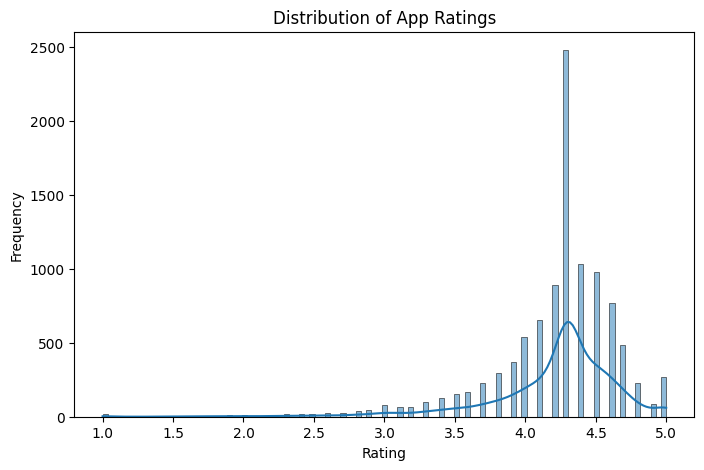

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Most apps have high ratings, clustering around the median of 4.3, with relatively few apps rated below 4.0. This skew towards higher ratings may indicate a positive bias in user ratings or that app quality is generally high.

#### 2.1.2 Number of Installations

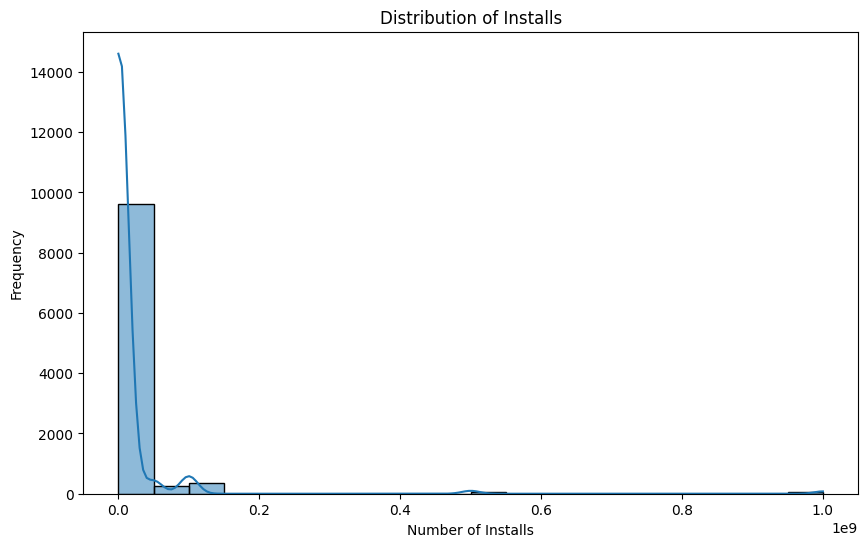

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=20, kde=True)
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

The distribution of Installs is highly skewed to the right, indicating that while a significant number of apps have low install counts, there are a few outliers with very high install numbers.

#### 2.1.3 Type(License)

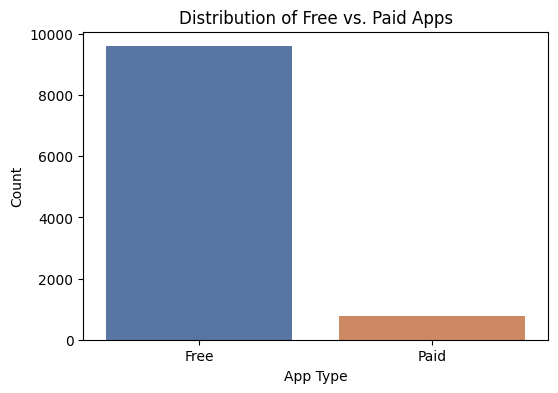

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df, hue='Type',palette='deep')
plt.title('Distribution of Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()


The majority of apps are free, which aligns with common app store trends. Paid apps, though fewer, could represent specialized or premium content.

#### 2.1.4 App Categories

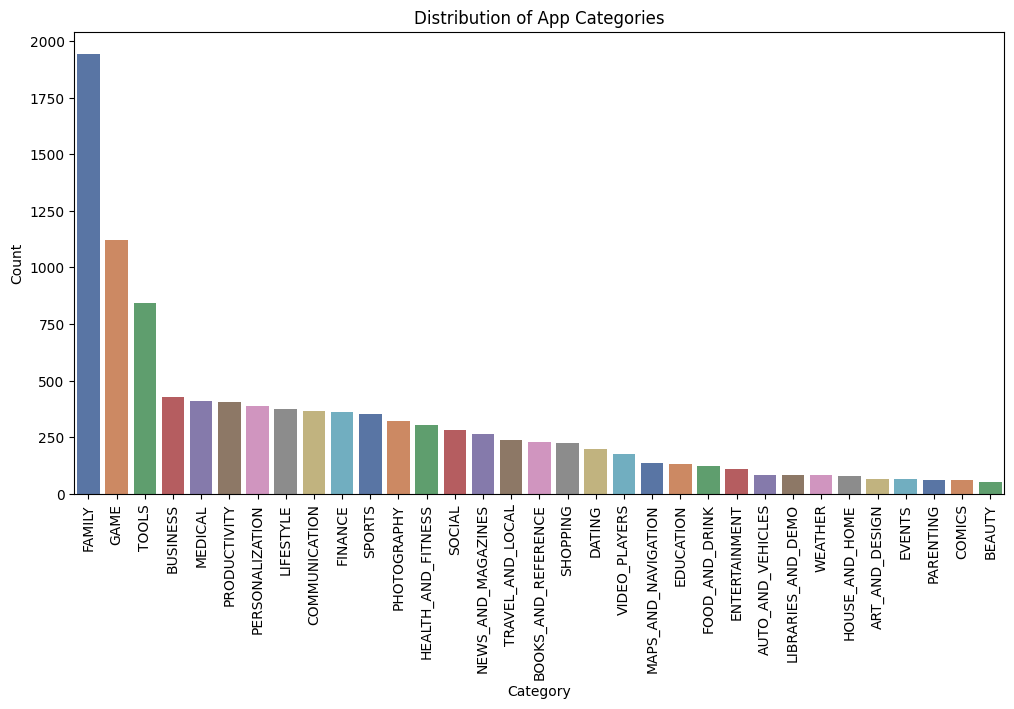

In [16]:
category_counts = df['Category'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='deep', legend=False)
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



The bar plot of app counts by category reveals a varied distribution across categories, with FAMILY and GAME being the most prevalent, hosting 1,972 and 1,144 apps respectively, indicating high developer focus.

In contrast, categories like COMICS, BEAUTY, and PARENTING have far fewer apps, suggesting either niche markets or lower developer focus.

#### 2.1.5 Content Rating(App Audience)

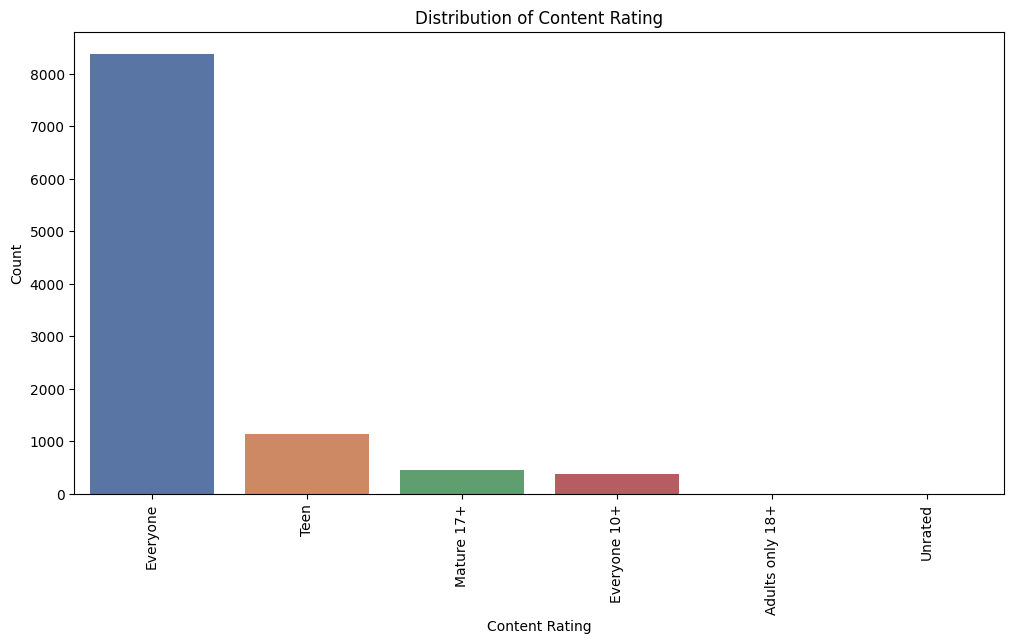

In [17]:
#Distribution of content Rating
cr_counts= df['Content Rating'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=cr_counts.index, y=cr_counts.values, hue=cr_counts.index, palette='deep', legend=False)
plt.title('Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The distribution of Content Rating shows that most apps target a general audience, with 8,714 rated Everyone, indicating a preference for broad accessibility. Teen (1,208) and Mature 17+ (499) apps are the next most common, catering to older audiences but still considerably fewer than Everyone. Ratings like Adults only 18+ (3) and Unrated (2) are rare, suggesting minimal focus on strictly adult content.

#### 2.1.6 Price

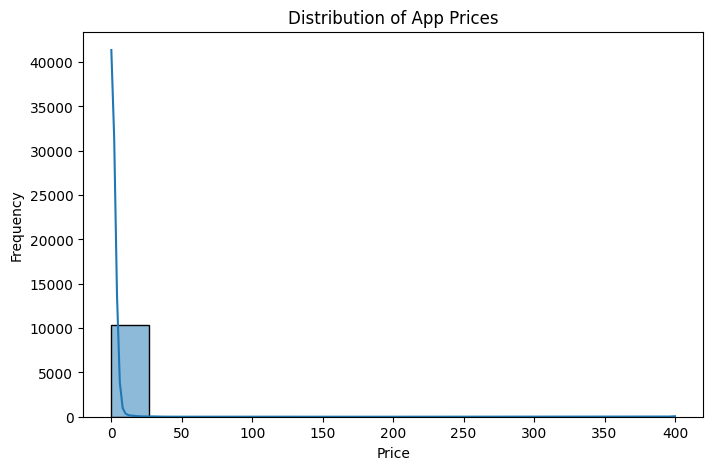

In [18]:
#Plot distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram of Price reveals a highly skewed distribution with a significant number of free apps (indicated by a price of $0$). Most apps fall within the $0$ range, while a few have prices that extend up to $400, indicating a long tail.

This distribution highlights the predominance of free applications in the dataset, with a relatively small segment of expensive options.

#### 2.1.7 App Size


In [19]:
#Distribution of App sizes
size_counts= df['Size_MB'].value_counts()
size_counts

,count
Size_MB,
Varies,1526
11.0,188
13.0,186
12.0,186
14.0,182
...,...
0.43,1
0.429,1
0.2,1


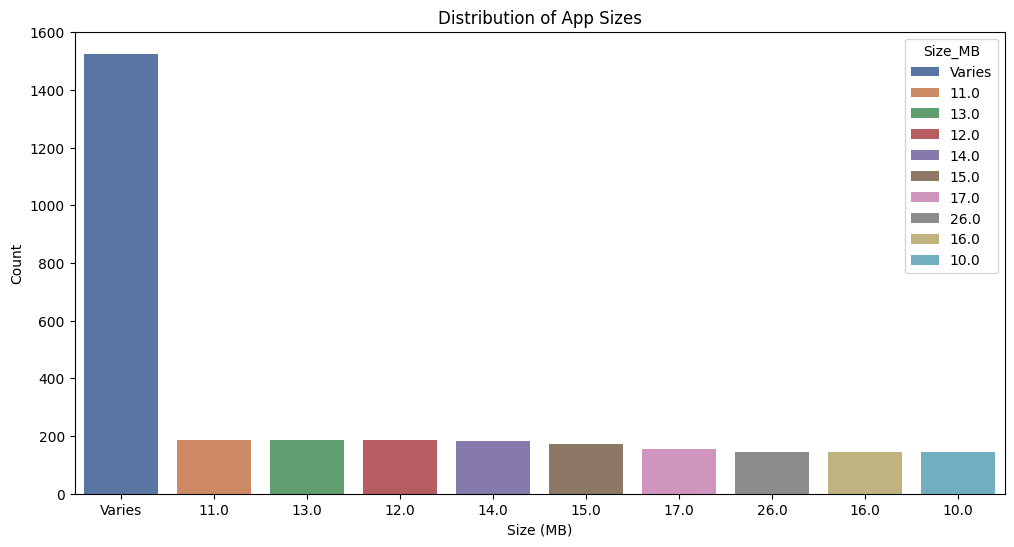

In [20]:
#filter to top 10 and plot
top_10_sizes = size_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sizes.index, y=top_10_sizes.values,hue=top_10_sizes.index, palette='deep')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Count')
plt.show()

The size distribution shows a notable reliance on smaller app sizes, which could reflect user preferences for quick downloads and efficient performance. The dominance of "Varies" suggests that a significant number of apps are tailored to different devices, indicating flexibility in design. The range of fixed sizes also suggests that developers are optimizing app performance and user experience by adhering to commonly accepted size benchmarks, balancing features and resource demands.

### 2.2 **Bivariate Analysis**
In this section, we will explore relationships between two variables at a time to understand how they interact with Installs, our target variable. We will primarily focus on visualizations and statistical measures.

#### 2.2.1 Rating vs Installs

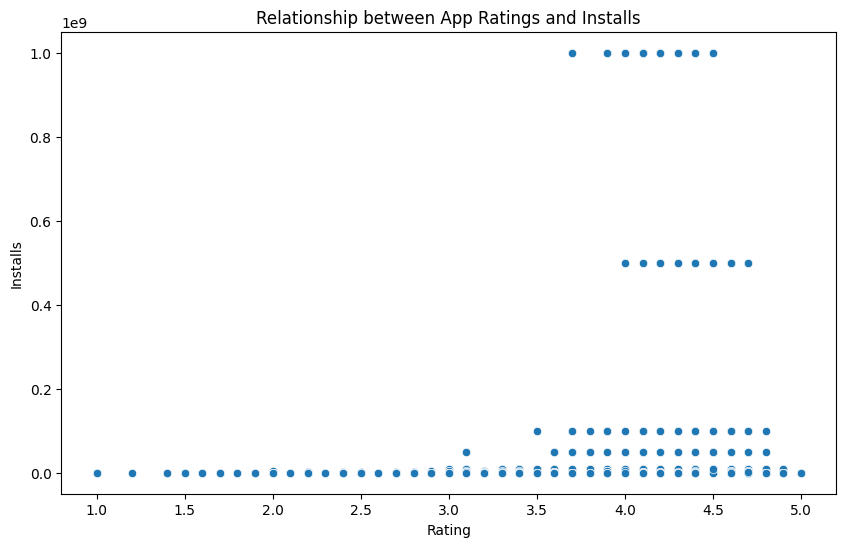

In [21]:
# Visualization: ScatterPlot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=df)
plt.title('Relationship between App Ratings and Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

The lack of a clear upward or downward trend suggests that other factors may influence the number of installs beyond just the app rating.

The clustering could indicate that many apps receive similar ratings, but their install counts vary due to external influences.

#### 2.2.2 Price vs Installs

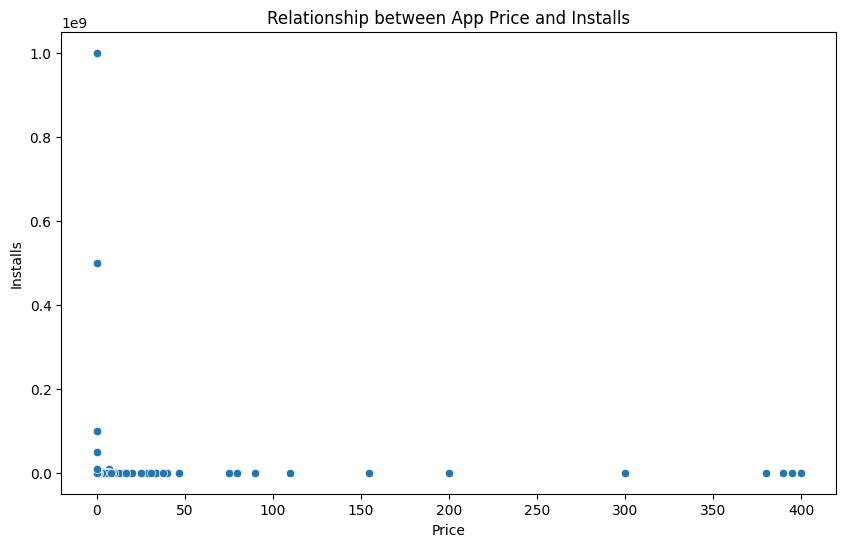

In [22]:
#Visualization: Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Installs', data=df)
plt.title('Relationship between App Price and Installs')
plt.xlabel('Price')
plt.ylabel('Installs')
plt.show()

The L-shaped distribution in the scatter plot indicates a strong preference for free apps among users, with a relatively small market for paid applications. This insight can inform strategies for pricing, marketing, and potentially the development of features that add value to justify higher prices.

#### 2.2.3 Type vs Installs

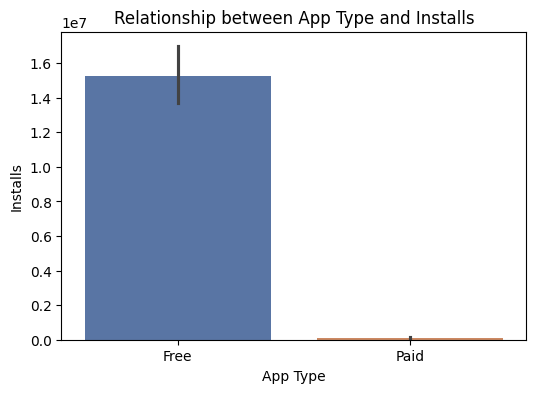

In [23]:
#Visualization: barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Type', y='Installs', data=df, hue='Type', palette='deep')
plt.title('Relationship between App Type and Installs')
plt.xlabel('App Type')
plt.ylabel('Installs')
plt.show()

This distribution suggests that the app type plays a significant role in an app’s potential install count.

It reinforces the previous observation that, free apps tend to attract more users, while paid apps may require higher perceived value to achieve significant downloads.


#### 2.2.4 Category vs Installs

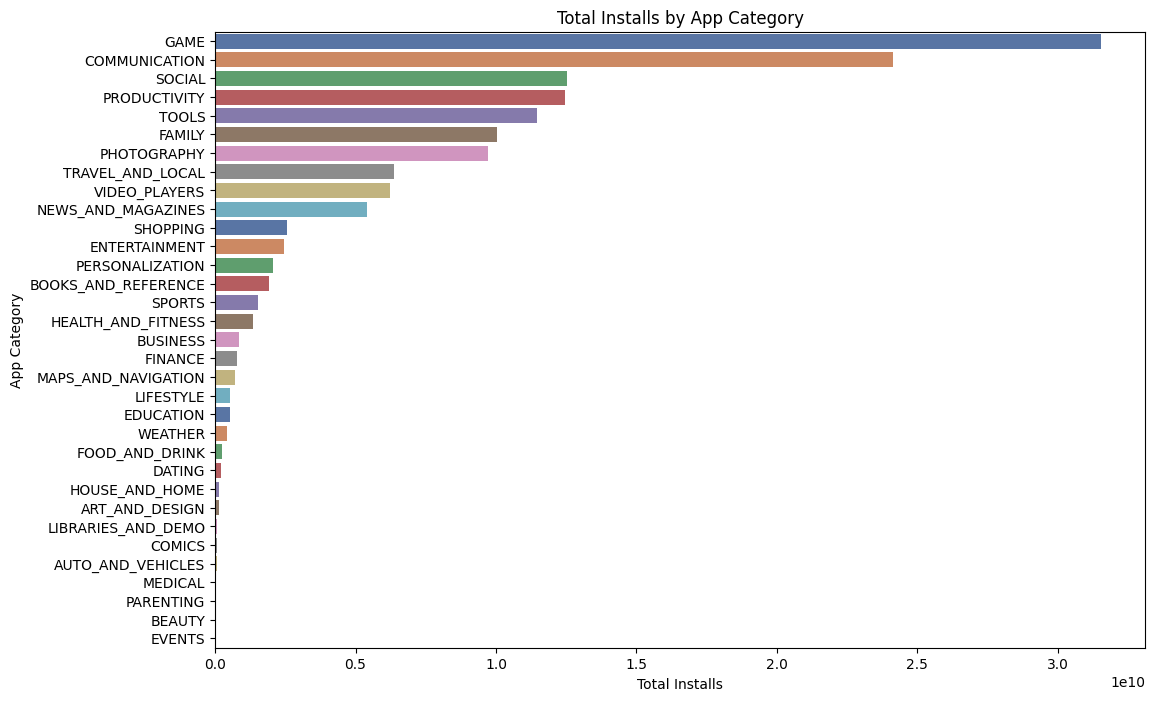

In [24]:
# Aggregating installs by category
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=category_installs.values, y=category_installs.index, hue=category_installs.index, palette='deep')
plt.title('Total Installs by App Category')
plt.xlabel('Total Installs')
plt.ylabel('App Category')
plt.show()

The distribution of installs shows that Games and Communication apps dominate, with Productivity and Social apps also attracting high user engagement. Categories like Tools, Family, and Photography have moderate installs, reflecting steady utility and informational demand. At the lower end, Events, Beauty, and Medical apps attract niche user interest, highlighting specialized appeal. This breakdown guides developers on which categories attract the most installs, informing app strategy for higher visibility and engagement.

#### 2.2.5 Content Rating vs Installs

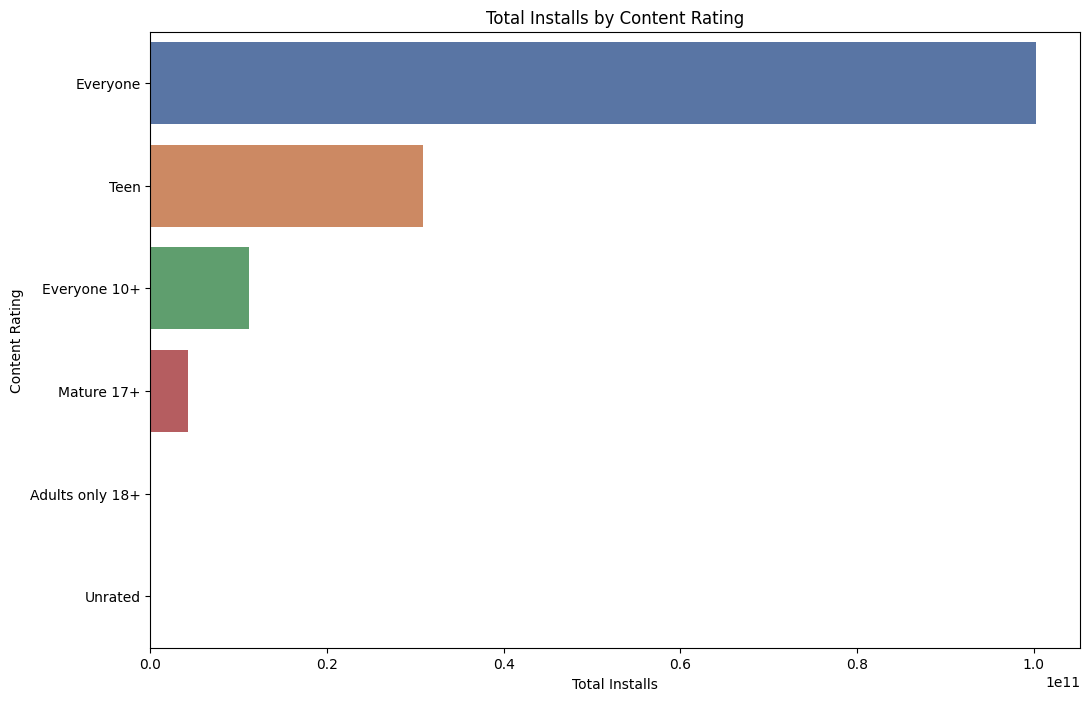

In [25]:
# Aggregating installs by Content Ratting
content_rating_installs = df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

#plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=content_rating_installs.values, y=content_rating_installs.index, hue=content_rating_installs.index, palette='deep')
plt.title('Total Installs by Content Rating')
plt.xlabel('Total Installs')
plt.ylabel('Content Rating')
plt.show()


Apps rated Everyone have the highest installs, showing broad appeal and accessibility across all age groups, followed by Teen and Everyone 10+ rated apps, which also draw significant installs.

Mature 17+ apps attract a smaller yet notable user base, appealing to a more selective audience.

Adults only 18+ and Unrated apps have minimal installs, indicating limited engagement, likely due to restricted age suitability or undefined content rating.

This distribution emphasizes the importance of age-appropriate ratings for maximizing app reach and installs.

### 2.3 **Multivariate Analysis**
Multivariate analysis helps explore interactions between multiple features, providing a deeper understanding of complex relationships in the dataset.

#### 2.3.1 Installs vs Category vs Type

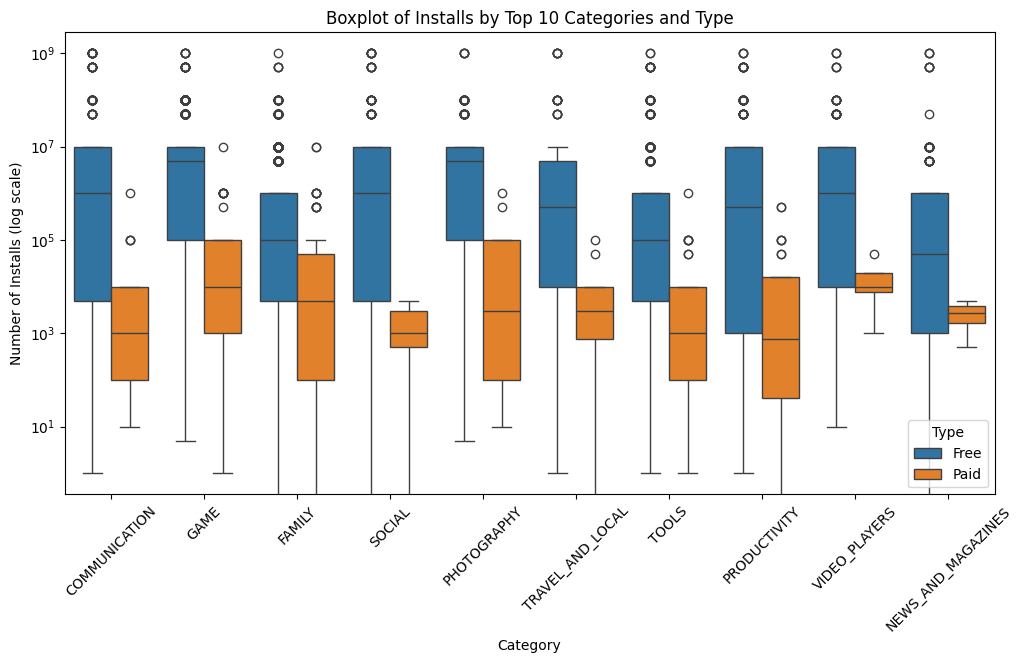

In [26]:
# Group by 'Category' and 'Type' to get the top 10 categories by total installs
top_categories = df.groupby('Category')['Installs'].sum().nlargest(10).index
filtered_df = df[df['Category'].isin(top_categories)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Category', y='Installs', hue='Type')
plt.title('Boxplot of Installs by Top 10 Categories and Type')
plt.xticks(rotation=45)
plt.yscale('log')  # Using log scale for better visibility
plt.xlabel('Category')
plt.ylabel('Number of Installs (log scale)')
plt.legend(title='Type')
plt.show()

The boxplot of installs by the top 10 categories and type reveals significant variability in app popularity across categories. The Communication category leads in median installs, with a wide interquartile range indicating diverse performance. Family and Game categories also show substantial installs, while Tools, Travel and Local, and Video Players have lower median counts. Free apps generally attract more installs than Paid apps, highlighting a competitive landscape where a few top performers skew the distribution upward.

#### 2.3.2 Installs by Content Rating and Type

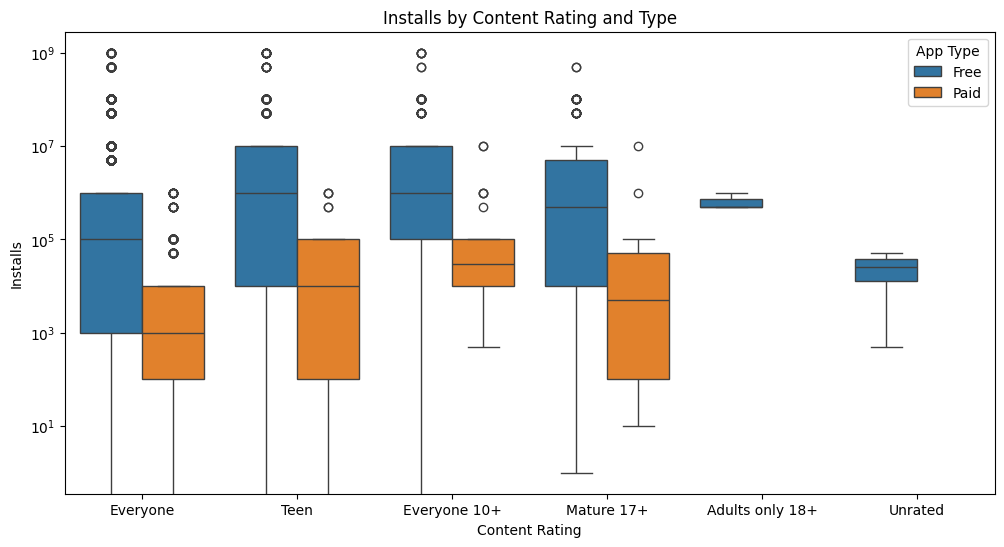

In [27]:
# Boxplot of Installs by Content Rating and Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Content Rating', y='Installs', hue='Type', data=df)
plt.yscale('log')
plt.title('Installs by Content Rating and Type')
plt.xlabel('Content Rating')
plt.ylabel('Installs')
plt.legend(title='App Type')
plt.show()


The boxplot of installs by content rating and type reveals that apps rated "Everyone" significantly outperform others in total installs, with a substantial median and wide interquartile range, indicating diverse performance.

In contrast, "Teen" and "Mature 17+" ratings show lower median installs, with the "Adults only 18+" category having the fewest installs, highlighting a limited audience.

 Free apps across all content ratings dominate in installs compared to their paid counterparts, reinforcing the trend observed in other analyses.

## **3. Data Preprocessing**

### 3.1 **Feature Engineering**

#### 3.1.1 Extracting Minimum Android Version

In [28]:
df['Android Ver'].value_counts(10)

,proportion
Android Ver,
4.1 and up,0.229893
4.0.3 and up,0.140098
4.0 and up,0.129091
Varies with device,0.117891
4.4 and up,0.086318
2.3 and up,0.062084
5.0 and up,0.052718
4.2 and up,0.037366
2.3.3 and up,0.026938


In [29]:
import re
def extract_min_android_version(version):
    # Check if the entry is "Varies with device"
    if version == 'Varies with device':
        return 0  # Assign a specific value to represent this category
    # Extract the minimum version using regex
    match = re.match(r'(\d+\.\d+)', version)
    if match:
        return float(match.group(1))  # Convert to float for numerical operations
    return None  # Fallback for unexpected formats

# Apply extraction
df['Min Android Ver'] = df['Android Ver'].apply(extract_min_android_version)


df[['Android Ver', 'Min Android Ver']]

,Android Ver,Min Android Ver
0,4.0.3 and up,4.0
1,4.0.3 and up,4.0
2,4.0.3 and up,4.0
3,4.2 and up,4.2
4,4.4 and up,4.4
...,...,...
10836,4.1 and up,4.1
10837,4.1 and up,4.1
10838,2.2 and up,2.2
10839,Varies with device,0.0


In [30]:
df['Min Android Ver'].value_counts(10)

,proportion
Min Android Ver,
4.0,0.269383
4.1,0.229989
0.0,0.117891
2.3,0.089022
4.4,0.087381
5.0,0.053104
4.2,0.037366
2.2,0.023173
3.0,0.022883


- Android 4.0 and 4.1 are the most common minimum versions, with 2878 and 2454 apps, respectively.

- Version 0.0 represents "Varies with device," totaling 1362 apps where the required version depends on the device specifications.

- Lower Android versions (like 2.3 and 2.2) still appear, indicating compatibility with older devices, while newer versions like 7.0 and 8.0 have fewer apps, suggesting lower support for recent Android releases in the dataset.

This distribution highlights app compatibility across various Android versions, from legacy (1.0) to modern releases, with a notable concentration around version 4.x.

#### 3.1.2 Categorizing Size

In [31]:
# Group size into 4 categories inclusive of "varies"
def categorize_size(size):
    if size == 'Varies':
        return 'Varies'
    elif size <= 10:
        return 'Small'
    elif size <= 50:
        return 'Medium'
    elif size <= 200:
        return 'Large'
    else:
        return 'Very Large'

# Apply the function to create the 'Size_Category' column
df['Size_Category'] = df['Size_MB'].apply(categorize_size)
df[['Size_MB', 'Size_Category']]

,Size_MB,Size_Category
0,19.0,Medium
1,14.0,Medium
2,8.7,Small
3,25.0,Medium
4,2.8,Small
...,...,...
10836,53.0,Large
10837,3.6,Small
10838,9.5,Small
10839,Varies,Varies


In [32]:
df['Size_Category'].value_counts()

,count
Size_Category,
Small,3995
Medium,3812
Varies,1526
Large,1024


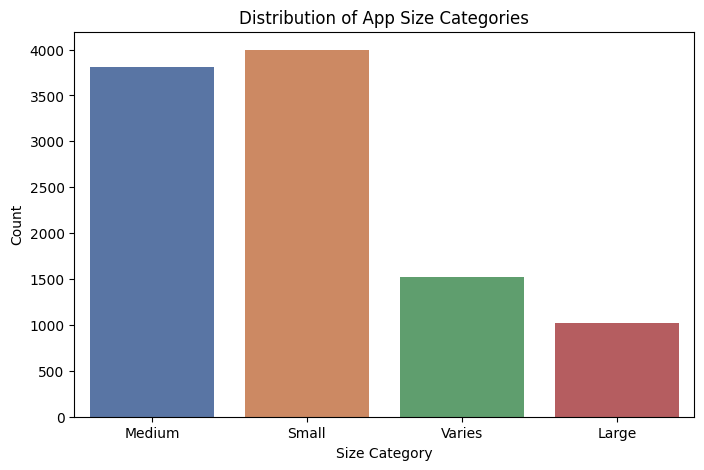

In [33]:
#plot of size_category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Size_Category', data=df, hue='Size_Category', palette='deep')
plt.title('Distribution of App Size Categories')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

The Size_Category column classifies app sizes into four categories:

- Small (≤10 MB): Contains 4060 apps, representing lightweight apps.

- Medium (10–50 MB): Includes 4011 apps, covering moderate-size apps.

- Large (50–200 MB): Encompasses 1074 apps, indicating apps with larger file sizes.

- Varies: Represents 1695 apps where size depends on the device, maintaining the original "Varies" classification.

This categorization provides a clear view of app size distribution, making it easier to analyze and compare app sizes across standardized groups.

#### 3.1.3 Binning Installs

In [34]:
'''#Binning installs into three categories(low, moderate, high)
install_bins = [0, 1000000, 10000000, float('inf')]
install_labels = ['Low', 'Moderate', 'High']

df['Install_Category'] = pd.cut(df['Installs'], bins=install_bins, labels=install_labels, right=False)
df[['Installs', 'Install_Category']].head()'''

"#Binning installs into three categories(low, moderate, high)\ninstall_bins = [0, 1000000, 10000000, float('inf')]\ninstall_labels = ['Low', 'Moderate', 'High']\n\ndf['Install_Category'] = pd.cut(df['Installs'], bins=install_bins, labels=install_labels, right=False)\ndf[['Installs', 'Install_Category']].head()"

In [35]:
#Binning installs into four categories(very low, low, moderate, high)
# Define bins and labels
bins = [0, 1000, 10000, 100000, float('inf')]
install_categories = ['Very Low', 'Low', 'Medium', 'High']

# Apply binning
df['Install_Category'] = pd.cut(df['Installs'], bins=bins, labels=install_categories, right=False)

In [36]:
df['Install_Category'].value_counts()

,count
Install_Category,
High,5700
Very Low,1791
Medium,1507
Low,1359


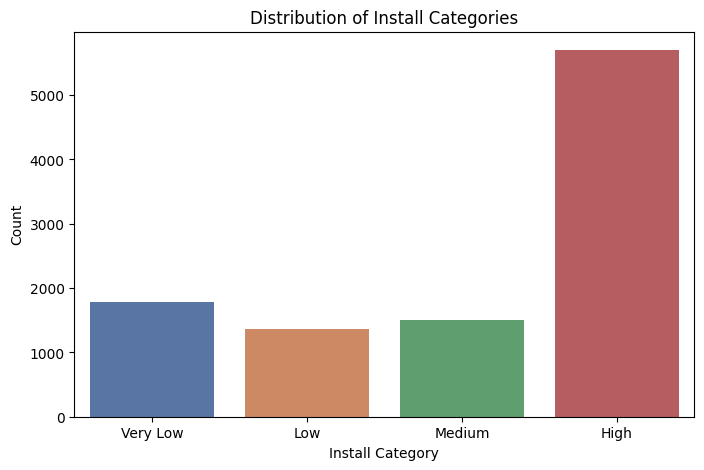

In [37]:
#plot distribution of the categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Install_Category', data=df, hue='Install_Category', palette='deep')
plt.title('Distribution of Install Categories')
plt.xlabel('Install Category')
plt.ylabel('Count')
plt.show()

In this step, the Installs feature has been binned into three categories (Low, Medium, and High) using the quartile method.

The "Install_Category" column was created by dividing the install counts into three equal-frequency groups based on the distribution of the data.
- Low: Represents apps with installs in the lower third of the distribution.
- Medium: Represents apps in the middle third.
- High: Represents apps with installs in the top third.

This categorization provides an easy way to interpret the popularity of an app in terms of install count, helping to simplify analysis and comparisons.

#### 3.1.4 Drop unnecessary columns

In [38]:
df.drop(['App', 'Last Updated', 'Current Ver', 'Genres', 'Size', 'Android Ver', 'Size_MB'], axis=1, inplace=True)
df.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Min Android Ver,Size_Category,Install_Category
0,ART_AND_DESIGN,4.1,159.0,10000,Free,0.0,Everyone,4.0,Medium,Medium
1,ART_AND_DESIGN,3.9,967.0,500000,Free,0.0,Everyone,4.0,Medium,High
2,ART_AND_DESIGN,4.7,87510.0,5000000,Free,0.0,Everyone,4.0,Small,High
3,ART_AND_DESIGN,4.5,215644.0,50000000,Free,0.0,Teen,4.2,Medium,High
4,ART_AND_DESIGN,4.3,967.0,100000,Free,0.0,Everyone,4.4,Small,High


### 3.2 **Feature Encoding**
In this step, we'll encode categorical features, converting them into a format interpretable by algorithms.

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [40]:
#Encode categorical columns
categorical_columns = ['Category', 'Type', 'Content Rating', 'Size_Category']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Min Android Ver,Size_Category,Install_Category
0,0,4.1,159.0,10000,0,0.0,1,4.0,1,Medium
1,0,3.9,967.0,500000,0,0.0,1,4.0,1,High
2,0,4.7,87510.0,5000000,0,0.0,1,4.0,2,High
3,0,4.5,215644.0,50000000,0,0.0,4,4.2,1,High
4,0,4.3,967.0,100000,0,0.0,1,4.4,2,High


## **4. Modelling**
The modeling phase involves building predictive models to classify the success of mobile applications based on various features. This phase utilizes machine learning techniques to develop models that can effectively predict the `Install_Category` of applications, categorized as Low, Medium, or High, based on the encoded features derived from the dataset.

### 4.1 Imports and Setup

In [41]:
!pip install scikeras

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore")

### 4.2 **Define Features and Target Variable**
- The features consist of various application attributes, including categorical variables (e.g., Category ) and numerical variables (e.g., Min Android Ver).
- The target variable for this classification task is `Install_Category`, representing the success level of the applications.

In [43]:
X = df.drop(columns= ['Install_Category'])
y = df['Install_Category']


### 4.3 Encode Target Variable and Split the data
Encoding the target variable using LabelEncoder ensures categorical targets are converted into numeric values for model training.

In [44]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#save the encoder as target encoder
joblib.dump(label_encoder, 'target_encoder.joblib')

['target_encoder.joblib']

In [45]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state= 42, stratify=y_encoded)


### 4.4 Handling Class Imbalance
We chose SMOTE for handling class imbalance, a common issue in classification problems. SMOTE synthesizes new samples for the minority classes to balance the dataset.

In [46]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### 4.5 Model Selection
 Each model pipeline will include scaling (important for models sensitive to feature magnitudes) and model-specific hyperparameter tuning.

Cross Validation

In [47]:
#Cross validation function
from sklearn.model_selection import cross_val_score
def cross_val(model):
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    return cv_scores



#### 4.5.1 Logistic Regression Pipeline
Logistic Regression serves as a baseline, offering interpretability and efficiency, especially with multiclass classification. Hyperparameters like C (regularization strength) and solver control regularization and convergence

In [48]:
# Baseline Logistic Regression Pipeline
baseline_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))  # Baseline Logistic Regression
])
baseline_logreg_pipeline.fit(X_resampled, y_resampled)
logreg_baseline_predictions = baseline_logreg_pipeline.predict(X_test)
logreg_baseline_predictions_decoded = label_encoder.inverse_transform(logreg_baseline_predictions)
y_test_decoded = label_encoder.inverse_transform(y_test)
print("Baseline Logistic Regression Report:")
print(classification_report(y_test_decoded, logreg_baseline_predictions_decoded, target_names=label_encoder.classes_))
# Tuned Logistic Regression Pipeline
logreg_param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__solver': ['lbfgs', 'liblinear'],
    'logreg__max_iter': [200, 500]
}
tuned_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])
logreg_grid_search = GridSearchCV(tuned_logreg_pipeline, param_grid=logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_resampled, y_resampled)
logreg_tuned_predictions = logreg_grid_search.best_estimator_.predict(X_test)
logreg_tuned_predictions_decoded = label_encoder.inverse_transform(logreg_tuned_predictions)
y_test_decoded = label_encoder.inverse_transform(y_test)
print("Tuned Logistic Regression Report:")
print(classification_report(y_test_decoded, logreg_tuned_predictions_decoded, target_names=label_encoder.classes_))

#cross validate
cross_val(logreg_grid_search.best_estimator_)

Baseline Logistic Regression Report:
              precision    recall  f1-score   support

        High       0.98      0.63      0.77      1140
         Low       0.27      0.18      0.22       272
      Medium       0.29      0.41      0.34       302
    Very Low       0.36      0.72      0.48       358

    accuracy                           0.56      2072
   macro avg       0.47      0.49      0.45      2072
weighted avg       0.68      0.56      0.58      2072

Tuned Logistic Regression Report:
              precision    recall  f1-score   support

        High       1.00      0.78      0.87      1140
         Low       0.32      0.16      0.21       272
      Medium       0.33      0.43      0.38       302
    Very Low       0.41      0.75      0.53       358

    accuracy                           0.64      2072
   macro avg       0.51      0.53      0.50      2072
weighted avg       0.71      0.64      0.66      2072

Cross-Validation Scores: [0.5095943  0.54358553 0.55071272 

array([0.5095943 , 0.54358553, 0.55071272, 0.54248904, 0.53262061])


- For Logistic Regression, the baseline model shows an F1-score of 0.45 (macro average) and 0.58 (weighted average), indicating a modest overall performance.

- The precision for the "High" category is 0.98, but recall is relatively low at 0.63, suggesting the model is very good at identifying "High" but misses a significant number of true positives.

- The "Low" and "Medium" categories have lower precision (0.27 and 0.29, respectively) and recall (0.18 and 0.41), reflecting difficulty in predicting these classes accurately.

- After tuning, the F1-score improves to 0.50 (macro average) and 0.66 (weighted average), with recall for the "High" category increasing to 0.78, highlighting improved identification of the "High" category.

-  However, the "Low" and "Medium" categories still perform poorly, as seen in the lower precision and recall values, especially for "Low" with recall at 0.16.

### 4.5.2 Random Forest Pipeline
Random Forest is an ensemble model robust to overfitting and performs well with unscaled data, although we’ll scale for consistency. Tuning parameters like n_estimators (number of trees) and max_depth enhances its performance and reduces overfitting.

In [49]:
# Baseline Random Forest Pipeline
baseline_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))  # Baseline Random Forest
])
baseline_rf_pipeline.fit(X_resampled, y_resampled)
rf_baseline_predictions = baseline_rf_pipeline.predict(X_test)
rf_baseline_predictions_decoded = label_encoder.inverse_transform(rf_baseline_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Baseline Random Forest Report:")
print(classification_report(y_test_decoded, rf_baseline_predictions_decoded, target_names=label_encoder.classes_))

# Tuned Random Forest Pipeline
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}
tuned_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_grid_search = GridSearchCV(tuned_rf_pipeline, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_resampled, y_resampled)
rf_tuned_predictions = rf_grid_search.best_estimator_.predict(X_test)
rf_tuned_predictions_decoded = label_encoder.inverse_transform(rf_tuned_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Tuned Random Forest Report:")
print(classification_report(y_test_decoded, rf_tuned_predictions_decoded, target_names=label_encoder.classes_))

#Cross validate
cross_val(rf_grid_search.best_estimator_)

Baseline Random Forest Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1140
         Low       1.00      1.00      1.00       272
      Medium       1.00      1.00      1.00       302
    Very Low       1.00      1.00      1.00       358

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072

Tuned Random Forest Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1140
         Low       1.00      1.00      1.00       272
      Medium       1.00      1.00      1.00       302
    Very Low       1.00      1.00      1.00       358

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


array([1., 1., 1., 1., 1.])


For Random Forest, both the baseline and tuned models perform exceptionally well, achieving perfect precision, recall, and F1-scores across all classes ("High," "Low," "Medium," and "Very Low"). The models classify each category with 100% accuracy, as indicated by the precision, recall, and F1-scores of 1.00 for all classes, leading to an overall accuracy of 1.00 and a macro and weighted average of 1.00. This suggests that the Random Forest model is highly effective in predicting all categories with no misclassifications, both before and after tuning.

We will perform cross validation to check whether the model is overfitting.

- Cross-validation helps ensure that your model generalizes well by using different data splits.
- If the cross-validation scores are consistently high across folds, the model is likely generalizing well.
- If there’s a large discrepancy between the folds, it could suggest instability or overfitting.

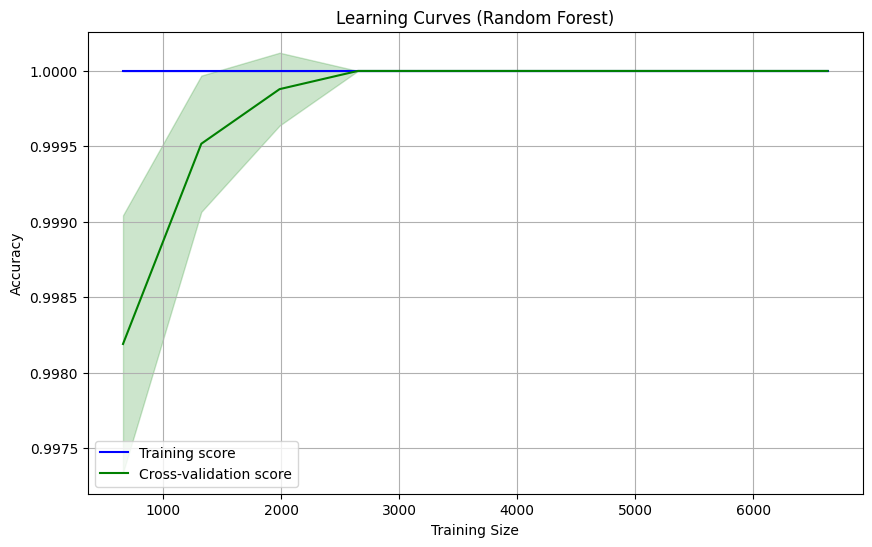

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and std deviation for train and validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green')

# Plot the fill_between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.show()


### 4.5.3 Support Vector Machine Pipeline
Support Vector Machine (SVM) is effective for classification with clear margins. The parameters C (penalty) and gamma (influence range) adjust complexity and performance.

In [51]:
# Baseline SVM Pipeline
baseline_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])
baseline_svm_pipeline.fit(X_resampled, y_resampled)
svm_baseline_predictions = baseline_svm_pipeline.predict(X_test)
svm_baseline_predictions_decoded = label_encoder.inverse_transform(svm_baseline_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Baseline SVM Report:")
print(classification_report(y_test_decoded, svm_baseline_predictions_decoded, target_names=label_encoder.classes_))

'''
# Tuned SVM Pipeline
svm_param_dist = {
    'svm__C': uniform(0.1, 10),  # Random distribution for C
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Or a few fixed values
    'svm__kernel': ['linear', 'rbf']  # Testing only 2 kernels to start with
}

# Define the SVM pipeline
tuned_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling for SVM
    ('svm', SVC(random_state=42))  # SVM model
])

# Set up RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    tuned_svm_pipeline,
    param_distributions=svm_param_dist,
    n_iter=50,  # Number of random combinations to test
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy to evaluate the models
    n_jobs=-1,  # Use all available CPUs to parallelize the search
    random_state=42
)

# Fit the RandomizedSearchCV
randomized_search.fit(X_resampled, y_resampled)

# Get predictions on the test set
svm_tuned_predictions = randomized_search.best_estimator_.predict(X_test)
svm_tuned_predictions_decoded = label_encoder.inverse_transform(svm_tuned_predictions)

# Decode the y_test values
y_test_decoded = label_encoder.inverse_transform(y_test)

# Print the classification report
print("Tuned SVM Report:")
print(classification_report(y_test_decoded, svm_tuned_predictions_decoded, target_names=label_encoder.classes_))

#Cross Validate
cross_val(randomized_search.best_estimator_)'''

Baseline SVM Report:
              precision    recall  f1-score   support

        High       0.91      0.55      0.68      1140
         Low       0.23      0.15      0.19       272
      Medium       0.27      0.35      0.30       302
    Very Low       0.33      0.74      0.46       358

    accuracy                           0.50      2072
   macro avg       0.43      0.45      0.41      2072
weighted avg       0.63      0.50      0.52      2072



KeyboardInterrupt: 

#### 4.5.4 XGBoost Classifier


In [52]:
# Baseline XGBoost Pipeline
baseline_xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for consistency
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])
baseline_xgb_pipeline.fit(X_resampled, y_resampled)
xgb_baseline_predictions = baseline_xgb_pipeline.predict(X_test)
xgb_baseline_predictions_decoded = label_encoder.inverse_transform(xgb_baseline_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Baseline XGBoost Report:")
print(classification_report(y_test_decoded, xgb_baseline_predictions_decoded, target_names=label_encoder.classes_))

# Tuned XGBoost Pipeline
xgb_param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__subsample': [0.8, 1.0]
}
tuned_xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for consistency
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])
xgb_grid_search = GridSearchCV(tuned_xgb_pipeline, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_resampled, y_resampled)
xgb_tuned_predictions = xgb_grid_search.best_estimator_.predict(X_test)
xgb_tuned_predictions_decoded = label_encoder.inverse_transform(xgb_tuned_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Tuned XGBoost Report:")
print(classification_report(y_test_decoded, xgb_tuned_predictions_decoded, target_names=label_encoder.classes_))

#Cross validate
cross_val(xgb_grid_search.best_estimator_)

Baseline XGBoost Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1140
         Low       1.00      1.00      1.00       272
      Medium       1.00      1.00      1.00       302
    Very Low       1.00      1.00      1.00       358

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072

Tuned XGBoost Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1140
         Low       1.00      1.00      1.00       272
      Medium       1.00      1.00      1.00       302
    Very Low       1.00      1.00      1.00       358

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


array([1., 1., 1., 1., 1.])

#### 4.4.5 Neural Network Model (Sequential API)
The neural network model adds complexity and flexibility for non-linear data patterns. The Dense layers and activation functions are tuned for classification with the softmax output layer.

In [55]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


train_model = model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Map predictions to original class labels

y_test_decoded = label_encoder.inverse_transform(y_test)
predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

# Use decoded predicted classes for classification report
print("Classification Report:\n", classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))



Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3555 - loss: 1085.0093 - val_accuracy: 0.6639 - val_loss: 263.2993
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4201 - loss: 716.6570 - val_accuracy: 0.7834 - val_loss: 166.4063
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6193 - loss: 1133.7705 - val_accuracy: 0.9452 - val_loss: 1.1524
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9300 - loss: 3.5996 - val_accuracy: 0.9383 - val_loss: 1.3998
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9291 - loss: 3.0549 - val_accuracy: 0.9378 - val_loss: 2.2685
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 8.5369 - val_accuracy: 0.9660 - val_loss: 0.4262
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9364 - loss: 3.4438 - val_accuracy: 0.9331 - val_loss: 1.1710
Epoch 8/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 3.3427 - val_

#### 4.5.6 Evaluation on Test Set
After identifying the best parameters, evaluate each model with classification metrics.

In [56]:
# Predict and evaluate each model
models = {
    'Logistic Regression': logreg_grid_search.best_estimator_,
    'Random Forest': rf_grid_search.best_estimator_,
    # 'SVM': randomized_search.best_estimator_,
    'XGBoost': xgb_grid_search.best_estimator_,
    'Neural Network': model
}

# Assuming y_test and predictions are encoded labels (numerical values)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Loop through each model for evaluation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    if model_name == 'Neural Network':
        # For Neural Network: Convert predictions to class labels first
        predicted_classes = np.argmax(model.predict(X_test), axis=1)
    else:
        predicted_classes = model.predict(X_test)

    # Decode predictions back to original class labels
    predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

    # Print classification report for each model
    print(classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))
    print("\n")


Evaluating Logistic Regression...
              precision    recall  f1-score   support

        High       1.00      0.78      0.87      1140
         Low       0.32      0.16      0.21       272
      Medium       0.33      0.43      0.38       302
    Very Low       0.41      0.75      0.53       358

    accuracy                           0.64      2072
   macro avg       0.51      0.53      0.50      2072
weighted avg       0.71      0.64      0.66      2072



Evaluating Random Forest...
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1140
         Low       1.00      1.00      1.00       272
      Medium       1.00      1.00      1.00       302
    Very Low       1.00      1.00      1.00       358

    accuracy                           1.00      2072
   macro avg       1.00      1.00      1.00      2072
weighted avg       1.00      1.00      1.00      2072



Evaluating XGBoost...
              precision    recall  f1-scor

In [54]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper
keras_model = KerasClassifier(model=create_model, epochs=20, batch_size=32, verbose=0)

# Perform cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model):
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    return cv_scores

cross_val(keras_model)

# Train the final model on the entire resampled data if desired
final_model = create_model()
final_model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

predictions = final_model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Map predictions to original class labels
y_test_decoded = label_encoder.inverse_transform(y_test)
predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

# Use decoded predicted classes for classification report
print("Classification Report:\n", classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))


Cross-Validation Scores: [0.63678728 0.97341009 0.96710526 0.65076754 0.98163377]
Mean CV Score: 0.8419407894736842
Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3090 - loss: 68514.9297 - val_accuracy: 0.6475 - val_loss: 0.5940
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3937 - loss: 1.2942 - val_accuracy: 0.7368 - val_loss: 0.3930
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3900 - loss: 1.1826 - val_accuracy: 0.7007 - val_loss: 0.4350
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3933 - loss: 1.1217 - val_accuracy: 0.7100 - val_loss: 0.4085
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3929 - loss: 1.0930 - val_accuracy: 0.7050 - val_loss: 0.4162
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3864 - loss: 1.0746 - val_accuracy: 0.7111 - val_loss: 0.4029
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3984 - loss: 1.0558 - val_accuracy: 0.7012 - v